<a href="https://colab.research.google.com/github/JaperTai77/Colab-notebook/blob/main/linearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [2]:
df['Price'] = data.target

## Data Transform

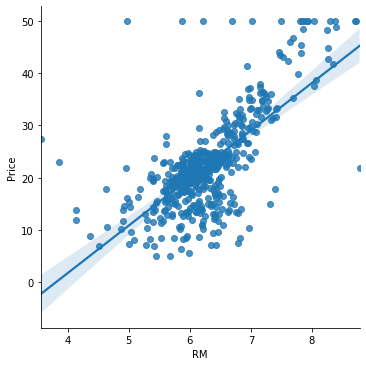

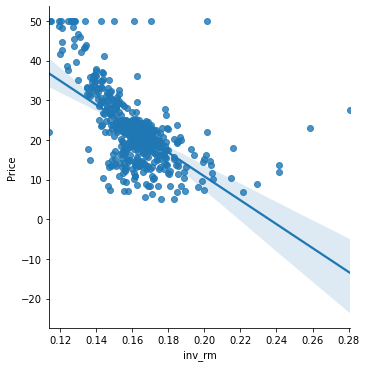

In [ ]:
df['inv_rm'] = 1/(df['RM'])
sns.lmplot(x='RM', y='Price', data=df, order=1)
sns.lmplot(x='inv_rm', y='Price', data=df, order=1)

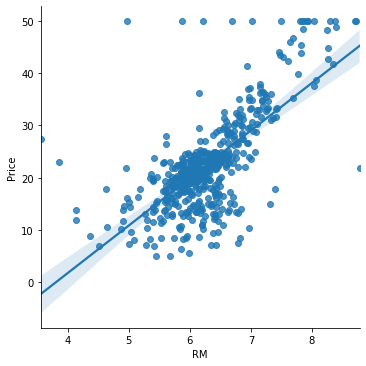

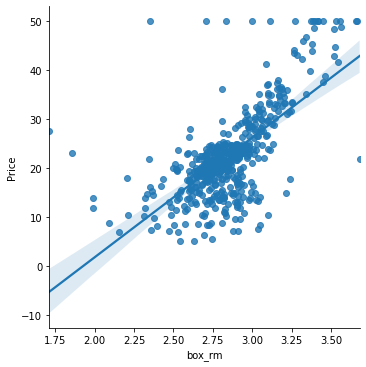

In [ ]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='box-cox', standardize=False)

df['box_rm'] = transformer.fit_transform(df[['RM']])

sns.lmplot(x='RM', y='Price', data=df, order=1)
sns.lmplot(x='box_rm', y='Price', data=df, order=1)

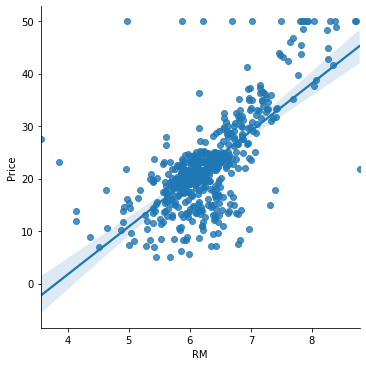

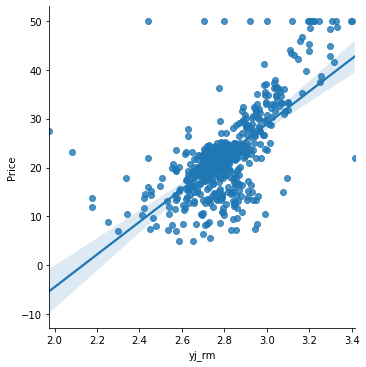

In [ ]:
transformer = PowerTransformer(method='yeo-johnson', standardize=False)

df['yj_rm'] = transformer.fit_transform(df[['RM']])

sns.lmplot(x='RM', y='Price', data=df, order=1)
sns.lmplot(x='yj_rm', y='Price', data=df, order=1)

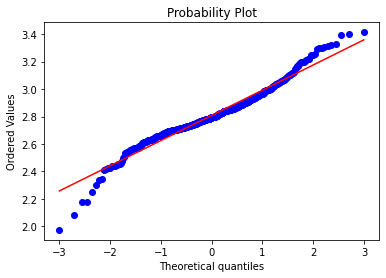

In [ ]:
stats.probplot(df['yj_rm'], dist='norm', plot=plt)
plt.show()

## Model Interpretability

In [5]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


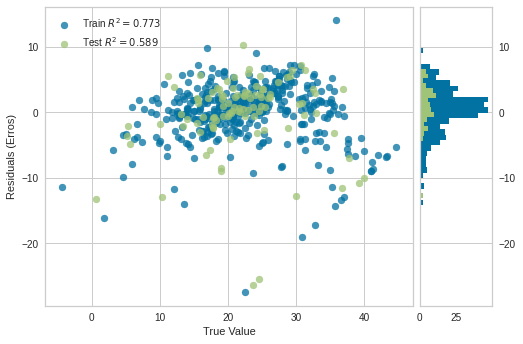

In [6]:
features = list(data.feature_names)
X_train, X_test, y_train, y_test = train_test_split(df[features],df['Price'],test_size=0.2,random_state=0)

model = LinearRegression()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.xlabel('True Value')
plt.ylabel('Residuals (Erros)')
plt.legend()
plt.show()

In [4]:
pip install lime

     |████████████████████████████████| 275 kB 5.7 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=65ba1ede2ef94e082f27ff6e976de1c38622afad274714c16a767bd311d82936
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [7]:
import lime
import lime.lime_tabular

X_train, X_test, y_train, y_test = train_test_split(df[features].to_numpy(),df['Price'].to_numpy(),test_size=0.2,random_state=0)

explainer = lime.lime_tabular.LimeTabularExplainer(X_train,feature_names=features,
                                                   class_names=['Price'],verbose=True,mode = 'regression')


In [8]:
i=100 # row number
exp = explainer.explain_instance(X_test[i], model.predict, num_features=5)

Intercept 23.01448618039517
Prediction_local [24.0596179]
Right: 25.30588843993583


In [9]:
exp.show_in_notebook(show_table=True)

In [3]:
pip install shap

     |████████████████████████████████| 356 kB 5.2 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491641 sha256=bb98f7de56d0df35f155a771618aa913668829d8b5e3f74381bb0a4e73509c27
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [17]:
import shap
shap.initjs()

Using 102 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


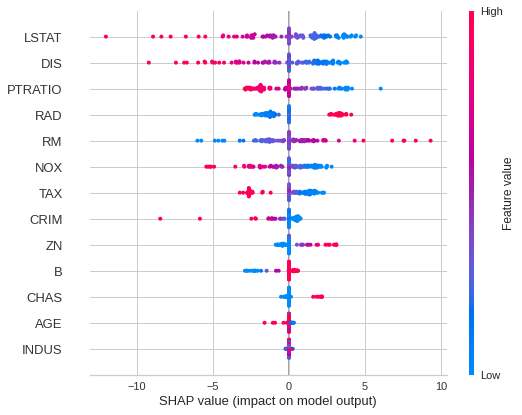

In [15]:
features = list(data.feature_names)
X_train, X_test, y_train, y_test = train_test_split(df[features],df['Price'],test_size=0.2,random_state=0)

explainer = shap.KernelExplainer(model.predict, X_test)

shap_values = explainer.shap_values(X_test, nsamples=50)

shap.summary_plot(shap_values, X_test)

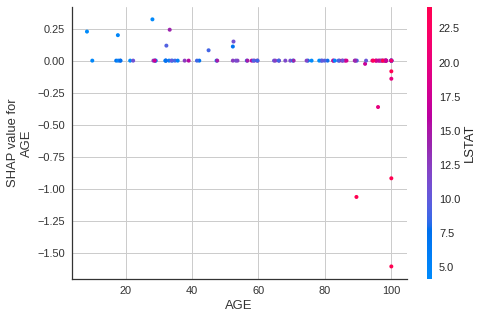

In [24]:
shap.dependence_plot('AGE', shap_values, X_test)

## Ridge Regression

In [26]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import r2_score

model = RidgeCV(alphas=(.01,0.05, 0.1, 0.4, 0.5, 1, 2, 3), scoring='r2')
model.fit(X_train, y_train)

model.alpha_

0.05

## Lasso Regression

In [27]:
from sklearn.linear_model import LassoCV

model = LassoCV(eps=0.0001, n_alphas=100, cv=5)
model.fit(X_train, y_train)

print(model.alpha_)
pd.Series(model.coef_, features)

0.1693734312825999


CRIM      -0.108990
ZN         0.048345
INDUS     -0.035007
CHAS       0.000000
NOX       -0.000000
RM         3.389283
AGE       -0.011218
DIS       -1.077870
RAD        0.213562
TAX       -0.013370
PTRATIO   -0.899917
B          0.009124
LSTAT     -0.542823
dtype: float64

## Elastic Net

In [28]:
from sklearn.linear_model import ElasticNetCV

model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1], tol=0.01, alphas=(.01,0.05, 0.1, 0.4, 0.5, 1, 2, 3))
model.fit(X_train, y_train)

print(model.alpha_)
pd.Series(model.coef_, features)

0.01


CRIM       -0.117837
ZN          0.045328
INDUS      -0.007173
CHAS        2.197912
NOX       -12.502410
RM          3.719366
AGE        -0.006276
DIS        -1.330245
RAD         0.233853
TAX        -0.011290
PTRATIO    -1.009690
B           0.008324
LSTAT      -0.496980
dtype: float64

In [31]:
model.l1_ratio_

1.0